[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'BLFS'}, xlabel='Date'>

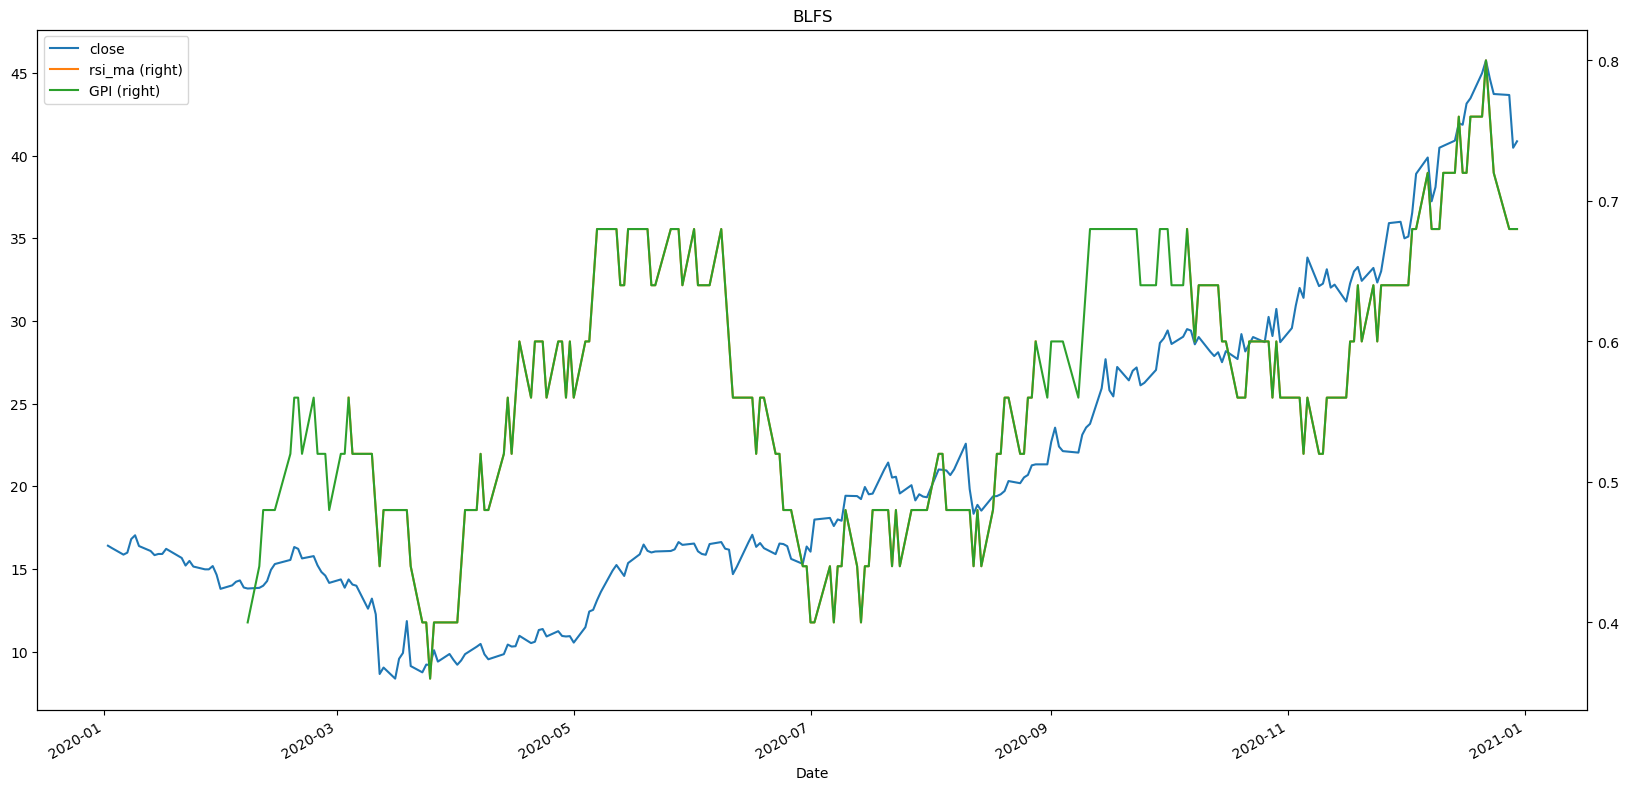

In [2]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas_ta as ta
from scipy.stats import entropy
import numpy as np
import math

def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

def get_indicator(q, ind_name, params):
    if ind_name == 'rsi':
        ts = q.ta.rsi(params['length']) / 100
    return ts

window=25
ticker='BLFS'
sp500=round(yf.download(tickers= ticker,start= '2020-01-01', end='2020-12-31',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)['Close'],2)
sp500.name='close'
df=sp500.to_frame()
df['rsi'] = get_indicator(df, 'rsi', {'length': 1})
df['rsi_ma'] =df['rsi'].rolling(window).mean()

df['GPI']=df['close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
df[['close','rsi_ma','GPI']].plot(secondary_y=['rsi_ma','GPI'],title=ticker,figsize=(20,10))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'NVDA'}, xlabel='Date'>

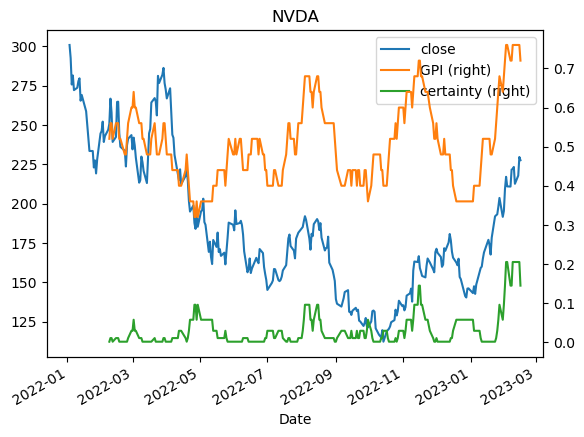

In [7]:
def entropy(p):
    ent = - p * math.log(p,2)-(1-p)*math.log(1-p,2)
    return ent

window=25
ticker='^GSPC'
sp500=round(yf.download(tickers= ticker,start= '2020-01-01', end='2020-11-20',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)['Close'],2)
sp500.name='close'
df=sp500.to_frame()
df['rsi'] = get_indicator(df, 'rsi', {'length': 1})
df['rsi_ma'] =df['rsi'].rolling(window).mean()

df['GPI']=df['close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
df['certainty']=1-df['GPI'].apply(entropy)
df[['close','GPI','certainty']].plot(secondary_y=['certainty','GPI'],title=ticker,figsize=(20,10))